In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline

C:\Users\maryn\AppData\Local\Temp\ipykernel_16432\2673770886.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
eda_data = pd.read_csv('c_data.csv')
eda_data = eda_data.drop(eda_data.columns[0], axis=1)
eda_data.head()

loan_amnt  credit_month  int_rate grade sub_grade  emp_length  \
0     5000.0            36    0.1065     B        B2        10.0   
1     2500.0            60    0.1527     C        C4         0.0   
2     2400.0            36    0.1596     C        C5        10.0   
3    10000.0            36    0.1349     C        C1        10.0   
4     3000.0            60    0.1269     B        B5         1.0   

  home_ownership  annual_inc verification_status     issue_d  ...  \
0           RENT     24000.0            Verified  2011-12-01  ...   
1           RENT     30000.0     Source Verified  2011-12-01  ...   
2           RENT     12252.0        Not Verified  2011-12-01  ...   
3           RENT     49200.0     Source Verified  2011-12-01  ...   
4           RENT     80000.0     Source Verified  2011-12-01  ...   

       purpose    dti  delinq_2yrs  earliest_cr_line fico_range  \
0  credit_card  27.65          0.0        1985-01-01      735.0   
1        other   1.00          0.0        1999-04-01      740.0   
2        other   8.72          0.0        2001-11-01      735.0   
3        other  20.00          0.0        1996-02-01      690.0   
4        other  17.94          0.0        1996-01-01      695.0   

   inq_last_6mths  open_acc  revol_bal  total_acc  pub_rec_bankruptcies  
0             1.0       3.0    13648.0        9.0                   0.0  
1             5.0       3.0     1687.0        4.0                   0.0  
2             2.0       2.0     2956.0       10.0                   0.0  
3             1.0      10.0     5598.0       37.0                   0.0  
4             0.0      15.0    27783.0       38.0                   0.0  

[5 rows x 21 columns]

In [3]:
eda_data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Dane są dość rozrzucone, występują outliery, jak również wartości NaN. 

<Axes: xlabel='fico_range', ylabel='count'>

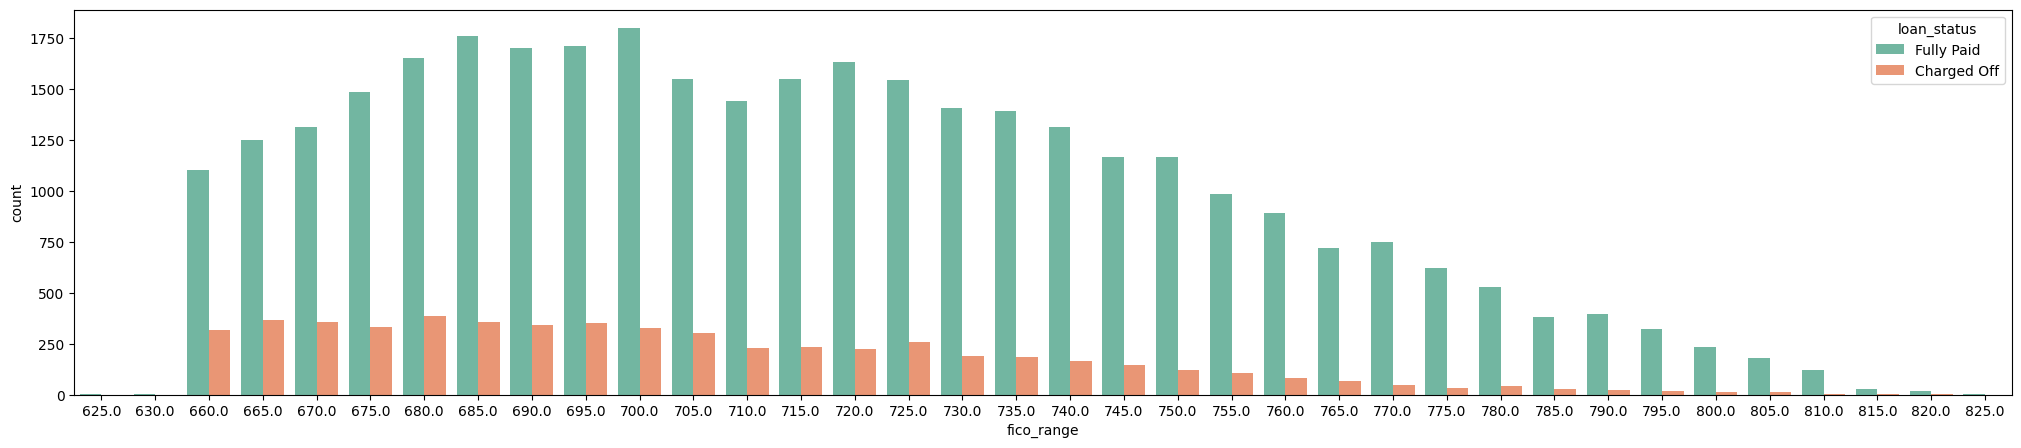

In [5]:
#1 W jaki sposób wynik FICO wiąże się z prawdopodobieństwem spłacenia pożyczki przez pożyczkobiorcę?
fig, ax = plt.subplots(figsize=(25, 5))
sns.countplot(data=eda_data, x='fico_range', hue = 'loan_status', palette= 'Set2', ax=ax)

Procentowa ilość niespłaconych pożyczek rośnie wraz ze spadkiem wyniku FICO. Dla małych wartości FICO stosunek spłaconych pożyczek do niespłaconych jest mniejszy, w porównaniu do wyższych wyników FICO.

<Axes: xlabel='credit_month', ylabel='count'>

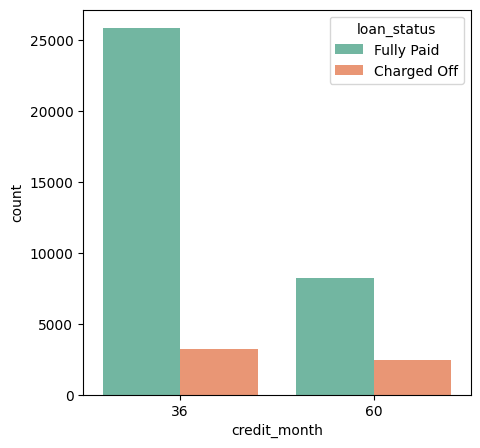

In [6]:
#2 W jaki sposób wiek kredytowy wiąże się z prawdopodobieństwem niewykonania zobowiązania 
#i czy ryzyko to jest niezależne lub związane z wynikiem FICO
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(data=eda_data, x='credit_month', hue = 'loan_status', palette= 'Set2', ax=ax)

Mniejszy wiek kredytowy wykazuje większą szansę na spłacenie pożyczki, w porównaniu do większego wieku. 

<Axes: xlabel='credit_month', ylabel='fico_range'>

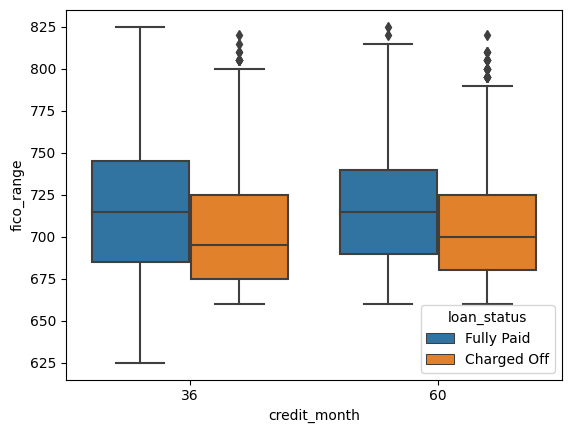

In [9]:
sns.boxplot(x = eda_data['credit_month'],
            y = eda_data['fico_range'],
            hue = eda_data['loan_status'])

<Axes: xlabel='fico_range', ylabel='count'>

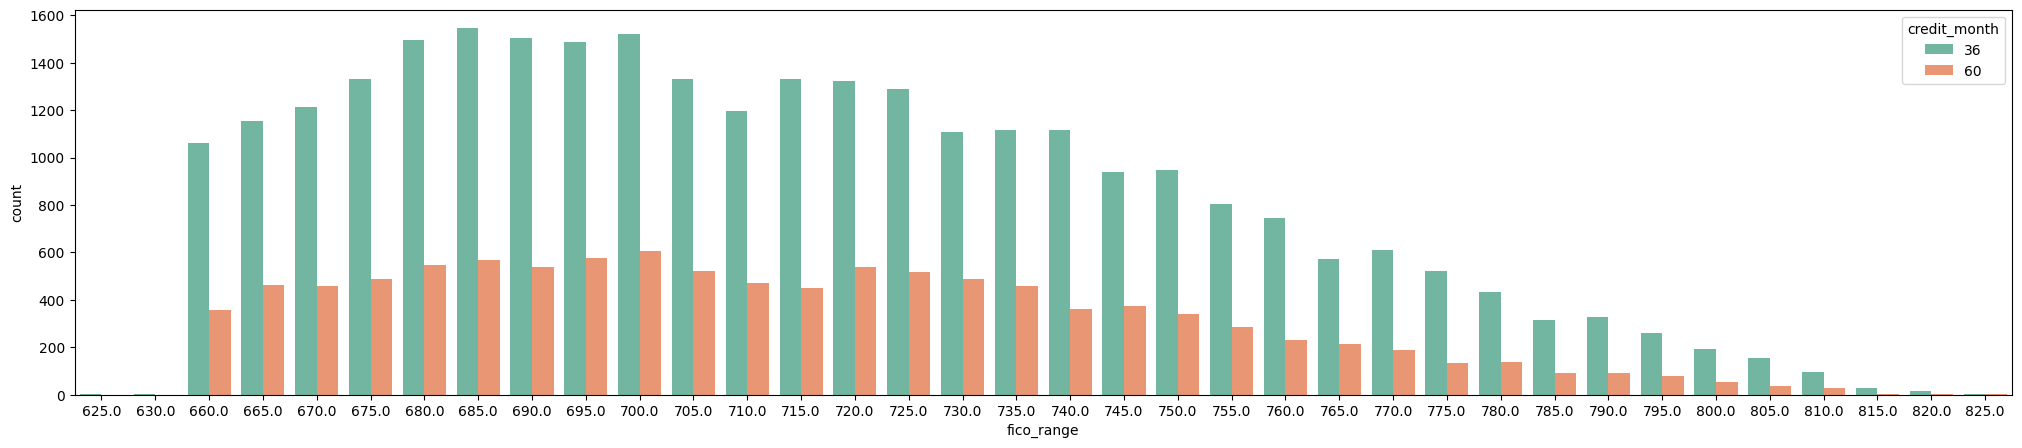

In [10]:
fig, ax = plt.subplots(figsize=(25, 5))
sns.countplot(data=eda_data, x='fico_range', hue = 'credit_month', palette= 'Set2', ax=ax)

Stosunek spłaconych i niespłaconych pożyczek dla całego zakresu wynikow FICO jest zbliżony, co wskazuje na brak powiązania wyniku FICO z wiekiem kredytowym.

<Axes: xlabel='home_ownership', ylabel='count'>

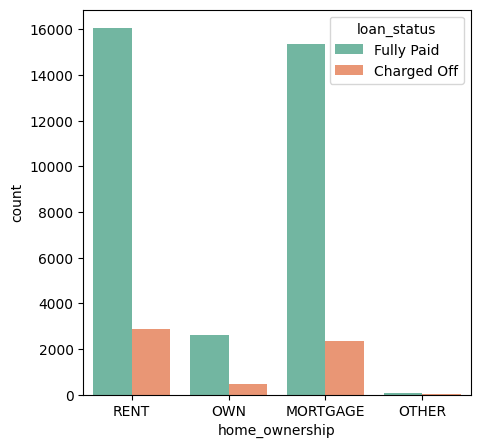

In [11]:
#3 W jaki sposób status kredytu hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności?
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(data=eda_data, x='home_ownership', hue = 'loan_status', palette= 'Set2', ax=ax)

Stosunek spłaconych pożyczek do niespłaconych dla kredytu hipotecznego jest podobny do pożyczek branych na wynajem i ma większe prawdopodobieństwo spłacenia, w porównaniu do pożyczki na własne mieszkanie. 

<Axes: xlabel='loan_status', ylabel='annual_inc'>

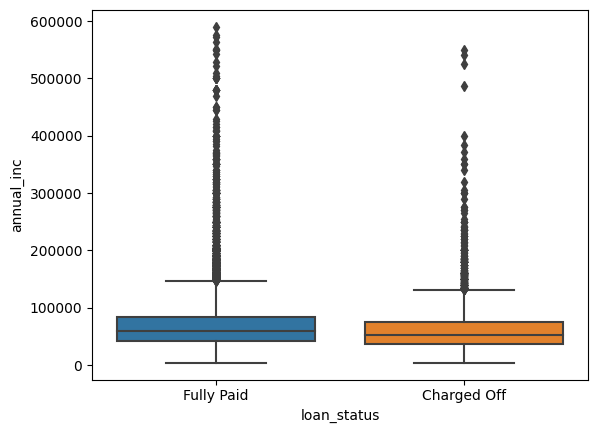

In [12]:
#4. W jaki sposób roczny dochód wiąże się z prawdopodobieństwem niewykonania zobowiązania?
sns.boxplot(x = eda_data['loan_status'],
            y = eda_data[eda_data['annual_inc']<600000]['annual_inc'])

Roczny dochód ma niewielkie znaczenie w spłaceniu pożyczki, osoby zarabiające więcej rocznie mają niewielką przewagę w spłaceniu pożyczki. 

<Axes: xlabel='loan_status', ylabel='emp_length'>

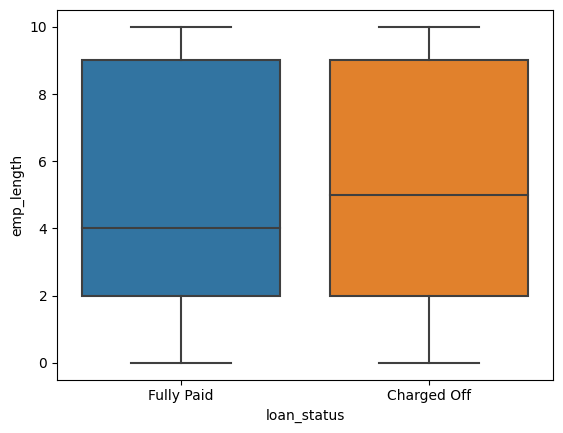

In [13]:
#5. W jaki sposób historia zatrudnienia wiąże się z prawdopodobieństwem niewykonania zobowiązania?
sns.boxplot(x = eda_data['loan_status'],
            y = eda_data['emp_length'])

Średni wiek dla osób, którzy niespłacili pożyczki jest większy w stosunku do tych, którzy spłacili. 

<Axes: xlabel='emp_length', ylabel='count'>

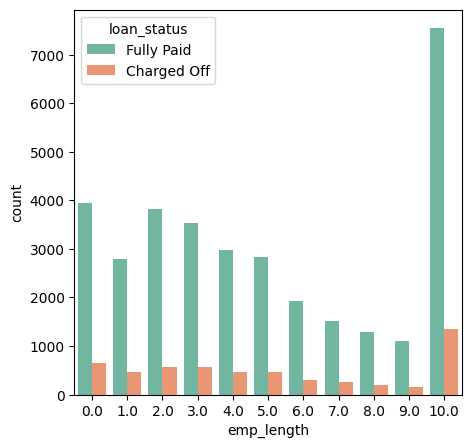

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(data=eda_data, x='emp_length', hue = 'loan_status', palette= 'Set2', ax=ax)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

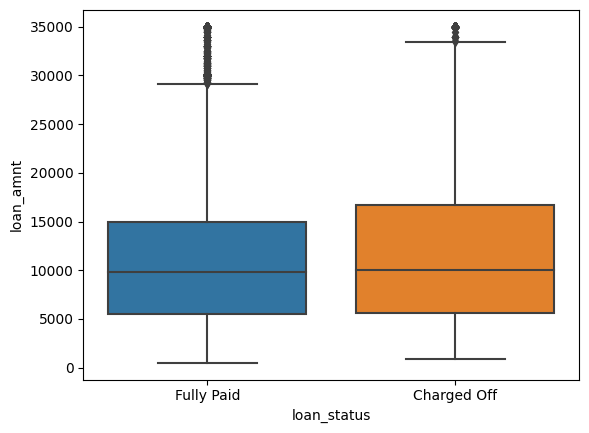

In [15]:
#6. Jak wielkość żądanej pożyczki jest powiązana z prawdopodobieństwem niewykonania zobowiązania?
sns.boxplot(x = eda_data['loan_status'],
            y = eda_data['loan_amnt'])

Wielkość pożyczki ma niewielkie znaczenie na prawdopodobieństwo jej spłacenia.